In [1]:
import gymnasium as gym
from tqdm import tqdm

example with pytorch: https://www.kaggle.com/code/dsxavier/dqn-openai-gym-cartpole-with-pytorch
example with tensorflow and most needed additions: https://www.kaggle.com/code/mehmetkasap/reinforcement-learning-deep-q-learning-cartpole

In [2]:
import numpy as np

In [2]:
env = gym.make('CartPole-v1')

In [17]:
s, _ = env.reset()

# 0 - car position [-4.8, +4.8]
# 1 - car velocity [-inf, +inf]
# 2 - pole angle [-0.418, + 0.418] rad or [-24, +24] deg
# 3 - pole angle velocity [-inf, +inf]

: 

In [1]:
class DQLAgent(): 
    
    def __init__(self, env):
        # parameters and hyperparameters
        
        # this part is for neural network or build_model()
        self.state_size = env.observation_space.shape[0] # this is for input of neural network node size
        self.action_size = env.action_space.n # this is for out of neural network node size
        
        # this part is for replay()
        self.gamma = 0.95
        self.learning_rate = 0.001
        
        # this part is for adaptiveEGreedy()
        self.epsilon = 1 # initial exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        
        self.memory = deque(maxlen = 1000) # a list with 1000 memory, if it becomes full first inputs will be deleted
        
        self.model = self.build_model()
    
    def build_model(self):
        # neural network for deep Q learning
        model = Sequential()
        model.add(Dense(48, input_dim = self.state_size, activation = 'tanh')) # first hidden layer
        model.add(Dense(self.action_size, activation = 'linear')) # output layer
        model.compile(loss = 'mse', optimizer = Adam(lr = self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        # storage
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        # acting, exploit or explore
        if random.uniform(0,1) <= self.epsilon:
            return env.action_space.sample()
        else:
            act_values = self.model.predict(state)
            return np.argmax(act_values[0])
            
    
    def replay(self, batch_size):
        # training
        
        if len(self.memory) < batch_size:
            return # memory is still not full
        
        minibatch = random.sample(self.memory, batch_size) # take 16 (batch_size) random samples from memory
        for state, action, reward, next_state, done in minibatch:
            if done: # if the game is over, I dont have next state, I just have reward 
                target = reward
            else:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0]) 
                # target = R(s,a) + gamma * max Q`(s`,a`)
                # target (max Q` value) is output of Neural Network which takes s` as an input 
                # amax(): flatten the lists (make them 1 list) and take max value
            train_target = self.model.predict(state) # s --> NN --> Q(s,a)=train_target
            train_target[0][action] = target
            self.model.fit(state, train_target, verbose = 0) # verbose: dont show loss and epoch
    
    def adaptiveEGreedy(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
     

In [ ]:

# initialize gym environment and agent
env = gym.make('CartPole-v1')
agent = DQLAgent(env)

batch_size = 16
episodes = 50
for e in range(episodes):
    
    # initialize environment
    state = env.reset()
    state = np.reshape(state, [1,4])
    
    time = 0 # each second I will get reward, because I want to sustain a balance forever
    while True:
        
        # act
        action = agent.act(state)
        
        # step
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1,4])
        
        # remember / storage
        agent.remember(state, action, reward, next_state, done)
        
        # update state
        state = next_state
        
        # replay
        agent.replay(batch_size)
        
        # adjust epsilon
        agent.adaptiveEGreedy()
        
        time += 1
        
        if done:
            print('episode: {}, time: {}'.format(e, time))
            break
    

In [10]:
results = {}
epsilons = [0.3,0.2,0.1,0.05,.01,0.005]
for eps in epsilons:
    with open(f'rewards_run_{eps}.npy','rb') as f:
        results[eps] = np.load(f)

In [11]:
import matplotlib.pyplot as plt

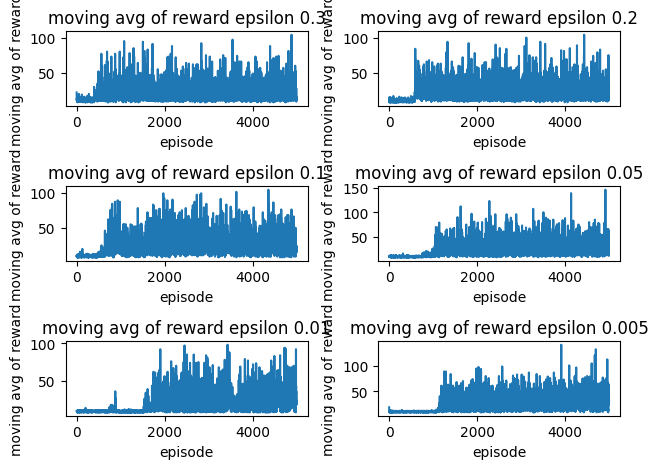

In [12]:

# plot moving average
fig, axs = plt.subplots(3, 2)
for i,ax in enumerate(axs.ravel()):
    if i < len(epsilons):
        ax.plot(results[epsilons[i]])
        ax.set_xlabel('episode')
        ax.set_ylabel('moving avg of reward')
        ax.set_title(f'moving avg of reward epsilon {epsilons[i]}')
plt.tight_layout()
plt.show()

In [23]:
with open(f'rewards_run_epsilon_decay.npy','rb') as f:
    result = np.load(f)

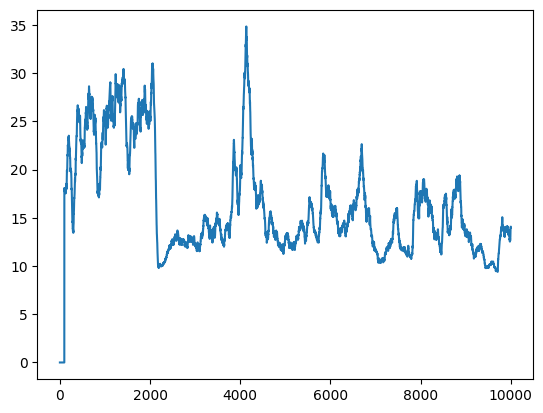

In [24]:
plt.plot(result)
plt.show()

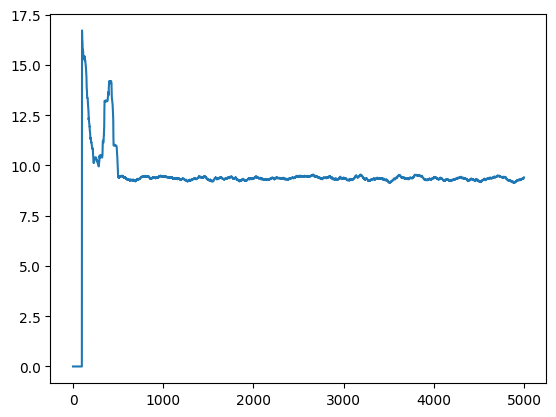

In [26]:
with open(f'rewards_run_epsilon_decay.npy','rb') as f:
    result = np.load(f)

plt.plot(result)
plt.show()